# Wordcount Solution

## Complete version

In [1]:
import os

In [2]:
import pycompss.interactive as ipycompss

In [3]:
from pycompss.api.task import task

In [4]:
from pycompss.api.parameter import *

In [5]:
if 'BINDER_SERVICE_HOST' in os.environ:
    ipycompss.start(graph=True, trace=True, debug=False,
                    project_xml='../xml/project.xml',
                    resources_xml='../xml/resources.xml')
else:
    ipycompss.start(graph=True, monitor=1000, trace=True, debug=False)

********************************************************
**************** PyCOMPSs Interactive ******************
********************************************************
*          .-~~-.--.           ______         ____     *
*         :         )         |____  \       |__  \    *
*   .~ ~ -.\       /.- ~~ .      __) |          ) |    *
*   >       `.   .'       <     |__  |         / /     *
*  (         .- -.         )   ____) |   _    / /__    *
*   `- -.-~  `- -'  ~-.- -'   |______/  |_|  |_____|   *
*     (        :        )           _ _ .-:            *
*      ~--.    :    .--~        .-~  .-~  }            *
*          ~-.-^-.-~ \_      .~  .-~   .~              *
*                   \ \ '     \ '_ _ -~                *
*                    \`.\`.    //                      *
*           . - ~ ~-.__\`.\`-.//                       *
*       .-~   . - ~  }~ ~ ~-.~-.                       *
*     .' .-~      .-~       :/~-.~-./:                 *
*    /_~_ _ . - ~              

In [6]:
@task(returns=list)
def read_file(file_path):
    """ Read a file and return a list of words.
    :param file_path: file's path
    :return: list of words
    """
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            data += line.split()
    return data

In [7]:
@task(returns=dict)
def wordCount(data):
    """ Construct a frequency word dictorionary from a list of words.
    :param data: a list of words
    :return: a dictionary where key=word and value=#appearances
    """
    partialResult = {}
    for entry in data:
        if entry in partialResult:
            partialResult[entry] += 1
        else:
            partialResult[entry] = 1
    return partialResult

In [8]:
@task(returns=dict, priority=True)
def merge_two_dicts(dic1, dic2):
    """ Update a dictionary with another dictionary.
    :param dic1: first dictionary
    :param dic2: second dictionary
    :return: dic1+=dic2
    """
    for k in dic2:
        if k in dic1:
            dic1[k] += dic2[k]
        else:
            dic1[k] = dic2[k]
    return dic1

In [9]:
from pycompss.api.api import compss_wait_on

# Get the dataset path
pathDataset = os.getcwd() + '/dataset'

# Read file's content execute a wordcount on each of them
partialResult = []
for fileName in os.listdir(pathDataset):
    file_path = os.path.join(pathDataset, fileName)
    data = read_file(file_path)
    partialResult.append(wordCount(data))

# Accumulate the partial results to get the final result.
result = {}
for partial in partialResult:
    result = merge_two_dicts(result, partial)

# Wait for result
result = compss_wait_on(result)

Found task: read_file
Found task: wordCount
Found task: merge_two_dicts


In [10]:
print("Result:")
from pprint import pprint
pprint(result)
print("Words: {}".format(sum(result.values())))

Result:
{'Adipisci': 227,
 'Aliquam': 233,
 'Amet': 207,
 'Consectetur': 201,
 'Dolor': 198,
 'Dolore': 236,
 'Dolorem': 232,
 'Eius': 251,
 'Est': 197,
 'Etincidunt': 232,
 'Ipsum': 228,
 'Labore': 229,
 'Magnam': 195,
 'Modi': 201,
 'Neque': 205,
 'Non': 226,
 'Numquam': 253,
 'Porro': 205,
 'Quaerat': 217,
 'Quiquia': 212,
 'Quisquam': 214,
 'Sed': 225,
 'Sit': 220,
 'Tempora': 189,
 'Ut': 217,
 'Velit': 218,
 'Voluptatem': 235,
 'adipisci': 1078,
 'aliquam': 1107,
 'amet': 1044,
 'consectetur': 1073,
 'dolor': 1120,
 'dolore': 1065,
 'dolorem': 1107,
 'eius': 1048,
 'est': 1101,
 'etincidunt': 1114,
 'ipsum': 1061,
 'labore': 1070,
 'magnam': 1096,
 'modi': 1127,
 'neque': 1093,
 'non': 1099,
 'numquam': 1094,
 'porro': 1101,
 'quaerat': 1086,
 'quiquia': 1079,
 'quisquam': 1144,
 'sed': 1109,
 'sit': 1130,
 'tempora': 1064,
 'ut': 1070,
 'velit': 1105,
 'voluptatem': 1121}
Words: 35409


In [11]:
ipycompss.stop()

********************************************************
***************** STOPPING PyCOMPSs ********************
********************************************************
Checking if any issue happened.
         have not been brought to the master.
********************************************************


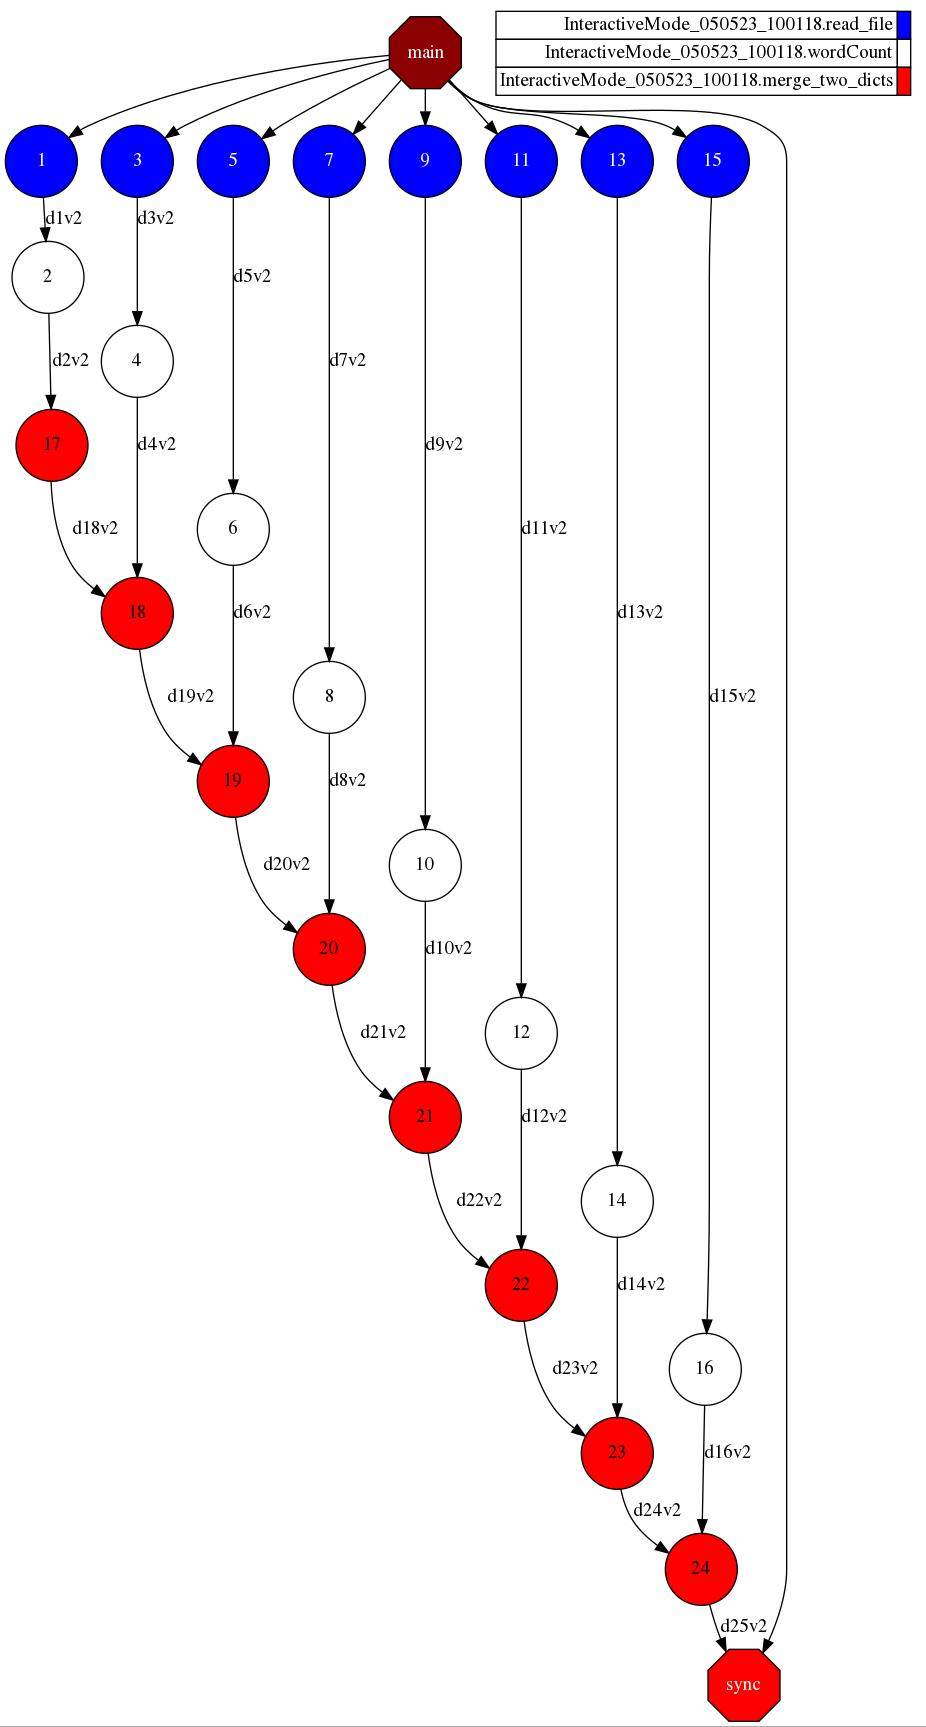

In [12]:
ipycompss.complete_task_graph(fit=True)